In [16]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import os

In [2]:
notebook_path = Path(os.getcwd())
root_path = notebook_path.parent.absolute()
os.chdir(root_path)
str(root_path)

'/Users/Antoine/data_science_projects/natixis_challenge'

### Loading datasets

In [3]:
df_cockpit = pd.read_csv('./data/cockpit_20221221.csv').drop('Unnamed: 0', axis=1)
df_item_info = pd.read_csv('./data/item_info_20221221.csv').drop('Unnamed: 0', axis=1)
df_item_trend = pd.read_csv('./data/item_trend_20221221.csv').drop('Unnamed: 0', axis=1)
df_mycloud = pd.read_csv('./data/mycloud_20221221.csv').drop('Unnamed: 0', axis=1)
df_tmp_hosts_zabbix = pd.read_csv('./data/tmp_hosts_zabbix_20221221.csv').drop('Unnamed: 0', axis=1)

In [4]:
print(df_cockpit.shape)
df_cockpit.head(2)

(5189, 22)


,name_department,iua,name_subfunction,name_function,name_server,model,name_state,name_environment,os,country,...,ram,number_core,number_cpu,type_cpu,electrical_power,server_parent,server_parent2,name_cluster,mycloud,bcloud
0,etu-bgc-etrading-architecture,AV9,Application Server,APPLICATION,SWDCFRAV9779,VIRTUAL_MACHINE,INFUNCTION,Dev,Windows 2016 Standard 10.0.14393,FRANCE,...,16777,2,2,INTEL(R) XEON(R) SILVER 4314 CPU @ 2.40GHZ,NaN,SEPCFRNXFX10808,NaN,NaN,Yes,NaN
1,etu-bgc-etrading-architecture,Y59,Application Server,APPLICATION,SLPAFRETR168,VIRTUAL_MACHINE,INFUNCTION,Prod,Linux 3.10.0-1160.76.1.el7.x86_64 RHEL7.9,FRANCE,...,7629,1,1,INTEL(R) XEON(R) CPU E5-2680 0 @ 2.70GHZ:X86_64,NaN,SEPIFRLINP029,NaN,NaN,No,NaN


In [24]:
df_cockpit.columns

Index(['name_department', 'iua', 'name_subfunction', 'name_function',
       'name_server', 'model', 'name_state', 'name_environment', 'os',
       'country', 'site', 'constructor', 'ram', 'number_core', 'number_cpu',
       'type_cpu', 'electrical_power', 'server_parent', 'server_parent2',
       'name_cluster', 'mycloud', 'bcloud'],
      dtype='object')

In [23]:
df_cockpit.name_server.apply(lambda x: x.upper()).nunique()

4368

In [5]:
print(df_item_info.shape)
df_item_info.head(2)

(10015, 3)


,itemid,hostid,item_type
0,264670,806,cpu
1,622332,4755,cpu


In [6]:
print(df_item_trend.shape)
df_item_trend.head(2)

(3866173, 6)


,itemid,clock,value_min,value_avg,value_max,item_type
0,264670,2021-05-27,5.789395,7.956363,50.884403,cpu
1,264670,2021-05-28,5.737689,10.279124,63.836303,cpu


In [ ]:
print(df_mycloud.shape)
df_mycloud.head(2)

(35, 5)


,key,NameMyCloud,CPU,RAM,Price
0,1#2,small,1,2,332.15
1,1#4,small_2,1,4,445.30


In [ ]:
print(df_tmp_hosts_zabbix.shape)
df_tmp_hosts_zabbix.head(2)

(4365, 2)


,hostid,host
0,6,slpdfrora040a
1,800,SWPAFRWNETV44


### Plotting evolutions

In [57]:
to_plot_moy = df_item_trend[["itemid", "value_avg"]].groupby("itemid").mean("value_avg").sort_values("value_avg", ascending=True).reset_index()
to_plot_min = df_item_trend[["itemid", "value_min"]].groupby("itemid").mean("value_min").sort_values("value_min", ascending=True).reset_index()
to_plot_max = df_item_trend[["itemid", "value_max"]].groupby("itemid").mean("value_max").sort_values("value_max", ascending=True).reset_index()

to_plot_moy.head()

,itemid,value_avg
0,100100034052435,0.075200
1,100100059854005,0.180526
2,100100057839888,0.187531
3,100100018555100,0.229399
4,100100018553592,0.236060


Text(0.5, 1.0, 'Capacity usage of RAM and CPUs in %.')

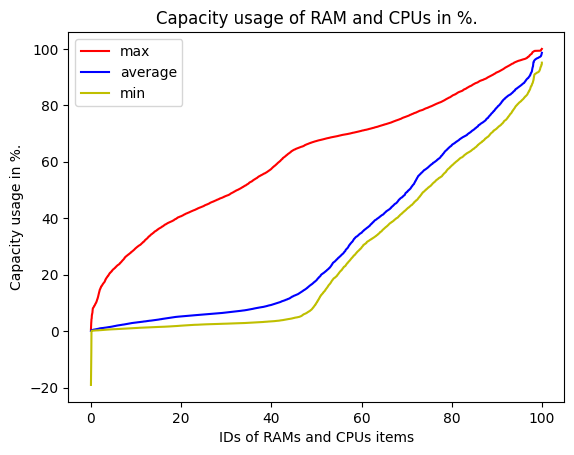

In [73]:
plt.plot([k*100/to_plot_max.shape[0] for k in range(to_plot_max.shape[0])], to_plot_max.value_max, c='r', label='max')
plt.plot([k*100/to_plot_moy.shape[0] for k in range(to_plot_moy.shape[0])], to_plot_moy.value_avg, c='b', label="average")
plt.plot([k*100/to_plot_min.shape[0] for k in range(to_plot_min.shape[0])], to_plot_min.value_min, c='y', label='min')
plt.legend()
plt.xlabel("IDs of RAMs and CPUs items")
plt.ylabel("Capacity usage in %.")
plt.title("Capacity usage of RAM and CPUs in %.")

In [70]:
itemid = 264670
to_plot = df_item_trend[df_item_trend["itemid"]==itemid].sort_values("clock")
to_plot.head()

,itemid,clock,value_min,value_avg,value_max,item_type
0,264670,2021-05-27,5.789395,7.956363,50.884403,cpu
1,264670,2021-05-28,5.737689,10.279124,63.836303,cpu
2,264670,2021-05-29,5.552335,8.445884,63.474760,cpu
3,264670,2021-05-30,4.105560,8.461657,81.754707,cpu
4,264670,2021-05-31,5.563129,10.716333,67.131448,cpu


Text(0.5, 1.0, 'Usage evolution of itemid n°264670 in % over time.')

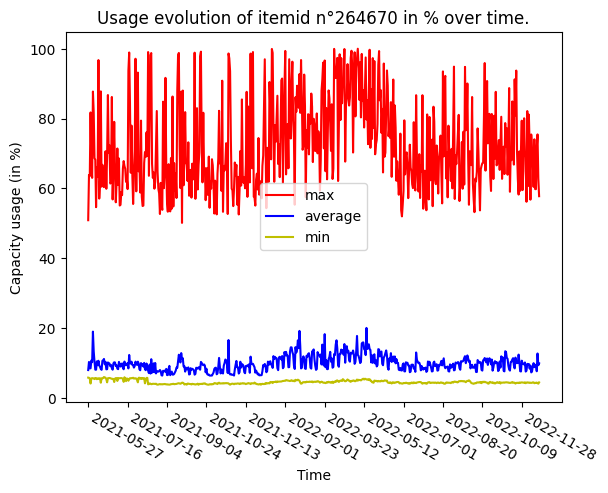

In [71]:
plt.plot(to_plot.clock, to_plot.value_max, c='r', label='max')
plt.plot(to_plot.clock, to_plot.value_avg, c='b', label='average')
plt.plot(to_plot.clock, to_plot.value_min, c='y', label='min')
plt.legend()

xticklabels = plt.gca().get_xticklabels()[::50]
xticks = plt.gca().get_xticks()[::50]
plt.gca().set_xticks(xticks, labels=xticklabels, rotation=-30, ha="left")

plt.xlabel('Time')
plt.ylabel('Capacity usage (in %)')
plt.title(f'Usage evolution of itemid n°{itemid} in % over time.')

### Checking correspondances server/host

In [20]:
df_text = df_tmp_hosts_zabbix.copy()
df_text["host"] = df_tmp_hosts_zabbix.host.apply(lambda x: x.upper())
print(df_text.groupby('host').count().sort_values('hostid', ascending=False))
df_text.groupby('hostid').count().sort_values('host', ascending=False)

               hostid
host                 
SLPCFRM31658        2
SWBCFRM32943        2
SWPCFRGRR259        2
MSDIPDBS01          1
SWPCFRCDB013        1
...               ...
SWBCFRAUO186        1
SWBCFRAUO200        1
SWBCFRAUO201        1
SWBCFRAUO239        1
SWUFRDV3WEB01       1

[4362 rows x 1 columns]


,host
hostid,
6,1
100100000249991,1
100100000250205,1
100100000250089,1
100100000250047,1
...,...
100100000176979,1
100100000177653,1
100100000177781,1


In [16]:
print(df_tmp_hosts_zabbix.groupby('host').count().sort_values('hostid', ascending=False))
df_tmp_hosts_zabbix.groupby('hostid').count().sort_values('host', ascending=False)

              hostid
host                
MSDIPDBS01         1
SWUCFRQ35650       1
SWUCFRQ38259       1
SWUCFRQ35979       1
SWUCFRQ35869       1
...              ...
SWPCFRAIC724       1
SWPCFRAIC737       1
SWPCFRAIC758       1
SWPCFRAIC784       1
swpcfrgrr259       1

[4365 rows x 1 columns]


,host
hostid,
6,1
100100000249991,1
100100000250205,1
100100000250089,1
100100000250047,1
...,...
100100000176979,1
100100000177653,1
100100000177781,1
